# Group Assignment Python

## Pre-processing the data

In [1]:
# load csv file as DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

from datetime import date, time, datetime
from sqlalchemy import create_engine, text
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from joblib import dump
from joblib import load


import os
import sys
import re
import time
import datetime


# load csv file as DataFrame
df = pd.read_csv('Data Model - Pizza Sales.xlsx - pizza_sales.csv')


In [2]:
# List of available fonts for data visualisation
fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
for font in sorted(fonts):
    print(font)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
Courier New
Courier New
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
Dej

In [3]:
# check the number of rows in each column
print(df.count())

# and the number of missing values in each column
print(df.isnull().sum())

# the data contains no missing values, hence, no need to drop any rows or columns or impute missing values

order_details_id     48620
order_id             48620
pizza_id             48620
quantity             48620
order_date           48620
order_time           48620
unit_price           48620
total_price          48620
pizza_size           48620
pizza_category       48620
pizza_ingredients    48620
pizza_name           48620
dtype: int64
order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [4]:
# check the data types of each column
print(df.dtypes)

order_details_id       int64
order_id               int64
pizza_id              object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


In [5]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [6]:
# convert the date column to datetime

df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time'])

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/2230823288.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'])


In [7]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time           datetime64[ns]
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

#### Multi-label Binarisation of pizza_ingredients

For the ingredients, we chose to analyse the various existing ingredients, as well as how often they're being used. Firstly to have a brief overview of the ingredients taht the shop uses. Secondly, to use multi-label binarisation for this categorical variable. Since the pizza_id will be used solely to have a look at the most popular pizza, we will not transform this variable into a numerical variable, as this would not provide additional value in our analysis, and will laikely only add more irrelevant data to filter through during our analysis.

Unique ingredients:
 {'Prosciutto', 'Italian Sausage', 'Red Peppers', 'Gouda Cheese', 'Romano Cheese', 'Kalamata Olives', 'Ricotta Cheese', 'Peperoncini verdi', 'Caramelized Onions', 'Pears', 'Sliced Ham', 'Tomatoes', 'Spinach', 'Goat Cheese', 'Luganega Sausage', 'Alfredo Sauce', 'Mushrooms', 'Green Olives', 'Jalapeno Peppers', 'Feta Cheese', 'Beef Chuck Roast', 'Barbecue Sauce', 'Chipotle Sauce', 'Mozzarella Cheese', 'Pancetta', 'Chicken', 'Thai Sweet Chilli Sauce', 'Bacon', 'Brie Carre Cheese', 'Provolone Cheese', 'Asiago Cheese', 'Soppressata Salami', 'Oregano', 'Garlic', 'Prosciutto di San Daniele', 'Zucchini', 'Coarse Sicilian Salami', 'Anchovies', 'Green Peppers', 'Nduja Salami', 'Arugula', 'Artichokes', 'Genoa Salami', 'Cilantro', 'Corn', 'Parmigiano Reggiano Cheese', 'Eggplant', 'Gorgonzola Piccante Cheese', 'Onions', 'Chorizo Sausage', 'Capocollo', 'Pepperoni', 'Friggitello Peppers', 'Plum Tomatoes', 'Fontina Cheese', 'Smoked Gouda Cheese', 'Calabrese Salami', 'Barbecued Chick

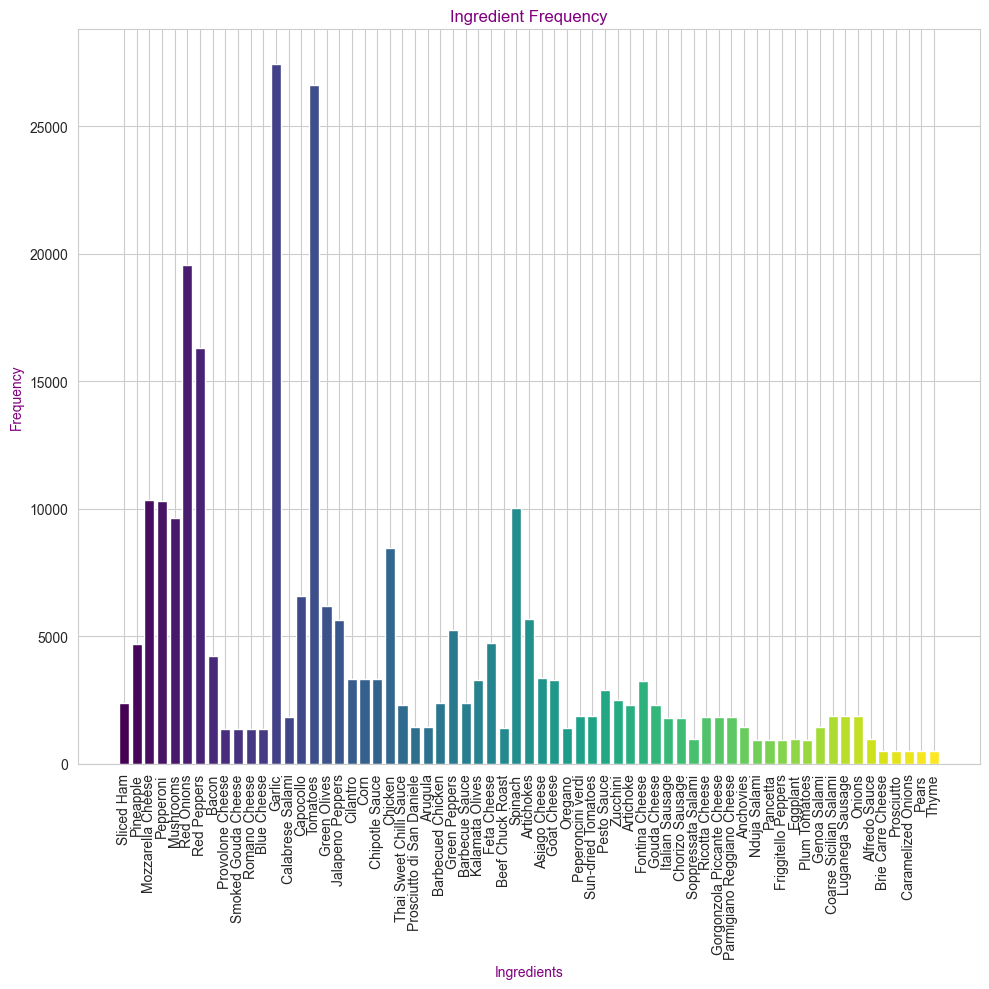

In [8]:
# Assuming df is your DataFrame and 'pizza_ingredients' is a column in this DataFrame

# Correct the spelling first
df['pizza_ingredients'] = df['pizza_ingredients'].str.replace('慛duja Salami', 'Nduja Salami')

# Then, split each string by commas and flatten the list to create 'all_ingredients'
all_ingredients = [ingredient.strip() for sublist in df['pizza_ingredients'] for ingredient in sublist.split(',')]

# Now, you can show all unique ingredients
unique_ingredients = set(all_ingredients)
print("Unique ingredients:\n", unique_ingredients)

# Count the number of unique ingredients
num_unique_ingredients = len(unique_ingredients)
print("Number of unique ingredients:", num_unique_ingredients)

# Assuming Futura or an alternative font is set
plt.rcParams['font.family'] = 'Arial'  # Replace 'Arial' with 'Futura' if available

# Count how many times each ingredient is used
ingredient_usage = Counter(all_ingredients)
print("Ingredient usage:\n", ingredient_usage)

# Create histogram of the ingredients
colors = plt.cm.viridis(np.linspace(0, 1, len(ingredient_usage)))
plt.figure(figsize=(10, 10))
plt.bar(ingredient_usage.keys(), ingredient_usage.values(), color=colors)
plt.xlabel('Ingredients', fontsize=10, color="purple")
plt.ylabel('Frequency', fontsize=10, color="purple")
plt.title('Ingredient Frequency', color="purple")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


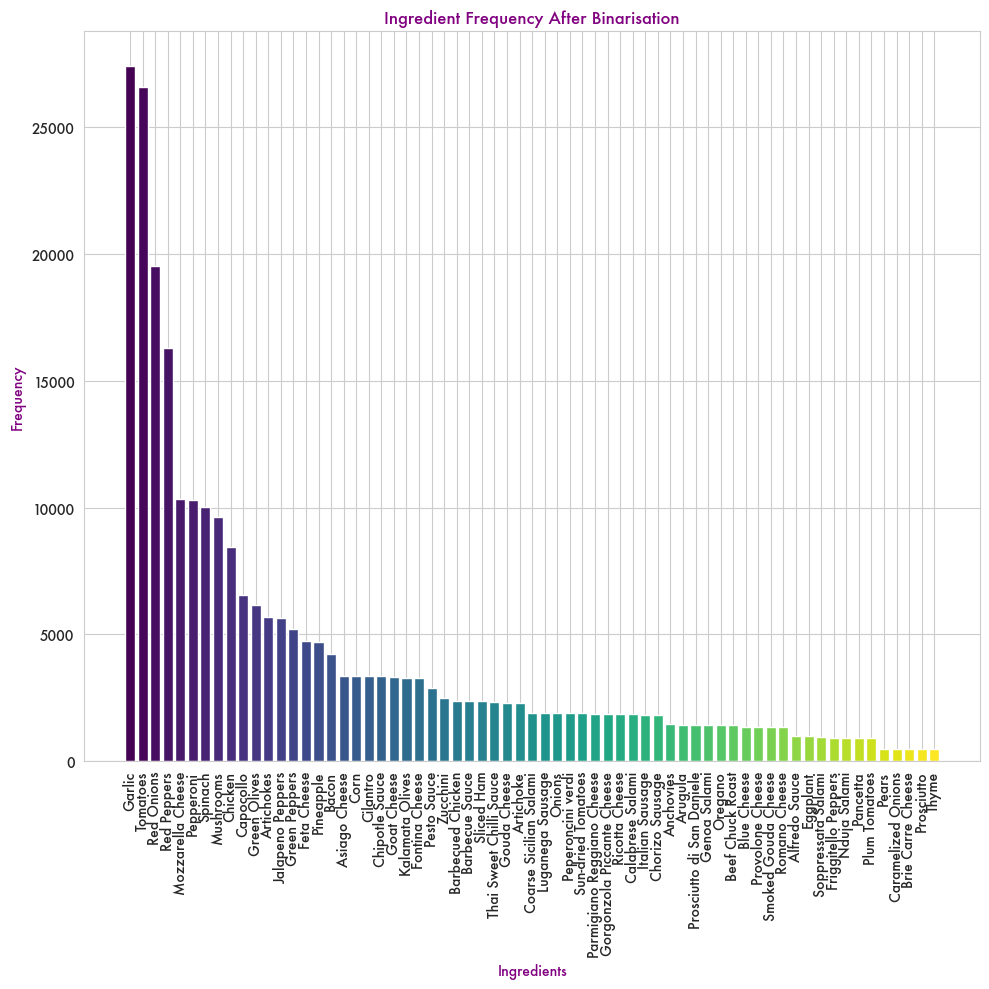

In [9]:
# to multil-label binarise the ingredients column, we need to convert the ingredients column to lists of strings

# Convert 'pizza_ingredients' from comma-separated strings to lists of ingredients
df['ingredient_list'] = df['pizza_ingredients'].apply(lambda x: [ingredient.strip() for ingredient in x.split(',')])

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'ingredient_list' column to get a binary matrix
binary_matrix = mlb.fit_transform(df['ingredient_list'])

# Create a DataFrame from the binary matrix
ingredients_df = pd.DataFrame(binary_matrix, columns=mlb.classes_)

plt.rcParams['font.family'] = 'Futura'

# Plotting the histogram of ingredient frequencies
# Summing up the occurrences of each ingredient across all pizzas
ingredient_counts = ingredients_df.sum().sort_values(ascending=False)

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(ingredient_counts)))

plt.figure(figsize=(10, 10))
# Apply the viridis colors to each bar
plt.bar(ingredient_counts.index, ingredient_counts.values, color=colors)
plt.xlabel('Ingredients', fontsize=10, color="purple")
plt.ylabel('Frequency', fontsize=10, color="purple")
plt.title('Ingredient Frequency After Binarisation', color="purple")
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout
plt.show()

In [10]:
#concatenating both DataFrames

df_combined = pd.concat([df, ingredients_df], axis=1)


In [11]:
# check the unique values in each of the categorical columns
print(df_combined[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']].apply(lambda x: x.unique()))

print(df_combined[['pizza_name']].apply(lambda x: x.unique()))

# remove the word "Pizza" from the pizza_name column
df_combined['pizza_name'] = df_combined['pizza_name'].str.replace('Pizza', '')

print(df_combined['pizza_name'].unique())

pizza_size                                          [M, L, S, XL, XXL]
pizza_category                     [Classic, Veggie, Supreme, Chicken]
pizza_ingredients    [Sliced Ham, Pineapple, Mozzarella Cheese, Pep...
pizza_name           [The Hawaiian Pizza, The Classic Deluxe Pizza,...
dtype: object
                                    pizza_name
0                           The Hawaiian Pizza
1                     The Classic Deluxe Pizza
2                        The Five Cheese Pizza
3                    The Italian Supreme Pizza
4                           The Mexicana Pizza
5                       The Thai Chicken Pizza
6             The Prosciutto and Arugula Pizza
7                   The Barbecue Chicken Pizza
8                              The Greek Pizza
9                    The Spinach Supreme Pizza
10                      The Green Garden Pizza
11                 The Italian Capocollo Pizza
12                     The Spicy Italian Pizza
13                     The Spinach Pesto Piz

In [12]:
# the order time was reduced to every half an hour for the sake of simplicity.
# Orders placed between 11:00 and 11:29 will be binned as 11:00, and orders placed between 11:30 and 11:59 will be binned as 11:30. This has been done for all the times in the order_time column.
# Example DataFrame creation
# Assuming 'order_time' is already in datetime format; if not, convert it using pd.to_datetime
# df['order_time'] = pd.to_datetime(df['order_time'])

# Function to bin times into half-hour intervals
def to_half_hour(dt):
    if dt.minute < 30:
        return dt.replace(minute=0, second=0)
    else:
        return dt.replace(minute=30, second=0)

# Apply the function to create a new 'half_hour_bin' column
df_combined['half_hour_bin'] = df_combined['order_time'].apply(to_half_hour)

print(df_combined['half_hour_bin'])


0       2024-03-20 11:30:00
1       2024-03-20 11:30:00
2       2024-03-20 11:30:00
3       2024-03-20 11:30:00
4       2024-03-20 11:30:00
                ...        
48615   2024-03-20 21:00:00
48616   2024-03-20 21:00:00
48617   2024-03-20 21:00:00
48618   2024-03-20 22:00:00
48619   2024-03-20 23:00:00
Name: half_hour_bin, Length: 48620, dtype: datetime64[ns]


#### The following data visualisation and EDA was taken directly from another Kaggle notebook to have a brief overview of the most popular pizzas, peaks in orders, the most famous pizza category etc. -- (feature engineering?)

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/2585286747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined_sorted, x="half_hour_bin", palette="plasma")


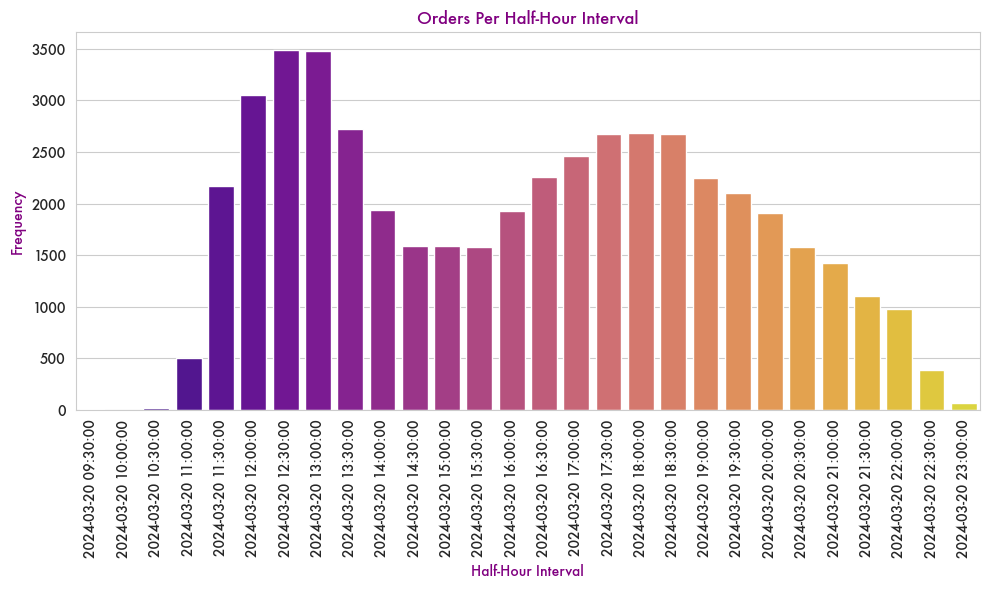

In [13]:
# Sort the DataFrame by 'half_hour_bin' to ensure chronological order
df_combined_sorted = df_combined.sort_values(by='half_hour_bin')

plt.rcParams['font.family'] = 'Futura'

# Now, plot using the sorted DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined_sorted, x="half_hour_bin", palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Half-Hour Interval", fontsize=10, color="purple")
plt.ylabel("Frequency", fontsize=10, color="purple")
plt.title("Orders Per Half-Hour Interval", color="purple")
plt.tight_layout()
plt.show()

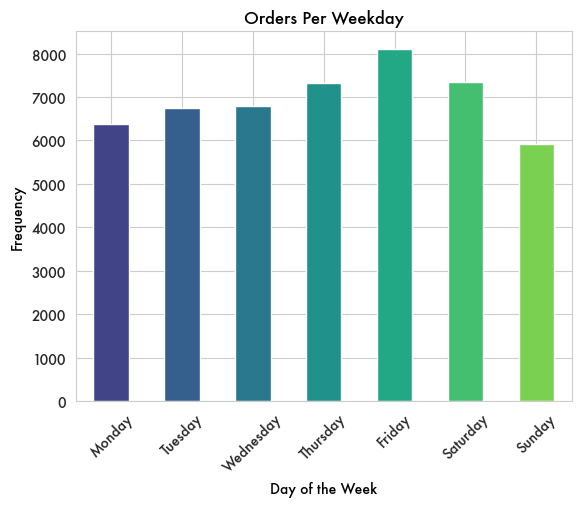

order_dates
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Sunday       5917
Name: count, dtype: int64


In [14]:
# Create a column with the day names
df['order_dates'] = df['order_date'].dt.day_name()

# Define the correct order for the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.rcParams['font.family'] = 'Futura'

# Use value_counts but reindex to ensure the days are in order, then plot
df['order_dates'].value_counts().reindex(weekday_order).plot(kind='bar', color=plt.get_cmap('viridis')(np.linspace(0.2, 0.8, len(weekday_order))))
plt.xlabel('Day of the Week', fontsize=10, color="black")
plt.ylabel('Frequency', fontsize=10, color="black")
plt.title('Orders Per Weekday', color="black")
plt.xticks(rotation=45)
plt.show()

# print counts of pizza orders per weekday
print(df['order_dates'].value_counts().reindex(weekday_order))

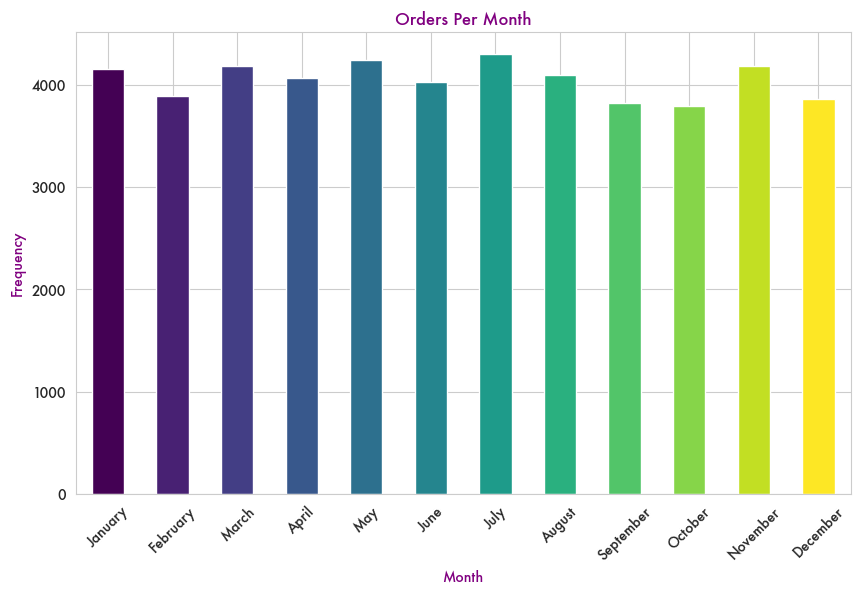

In [15]:
plt.rcParams['font.family'] = 'Futura'

# Create a column with month names directly
df_combined['order_month'] = df_combined['order_date'].dt.month_name()

# Ensure the order of months when plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
order_month_counts = df_combined['order_month'].value_counts().reindex(month_order)

# Plotting
plt.figure(figsize=(10, 6))
order_month_counts.plot(kind='bar', color=plt.get_cmap('viridis')(np.linspace(0, 1, len(month_order))))
plt.xlabel('Month', fontsize=10, color="purple")
plt.ylabel('Frequency', fontsize=10, color="purple")
plt.title('Orders Per Month', color="purple")
plt.xticks(rotation=45)
plt.show()


# Saving to SQLite database

In [16]:
# Define the SQLite database URI
db_uri = "sqlite:///pizza_sales.db"

# Create the database engine
engine = create_engine(db_uri)

# Serialize the 'ingredient_list' column to a comma-separated string
df['ingredient_list'] = df['ingredient_list'].apply(lambda x: ', '.join(x))

# Save the DataFrame to the SQLite database, replacing the table if it already exists
df.to_sql('sales_data', engine, if_exists='replace', index=False)
print("Dataframe is loaded into SQLite database successfully.")


Dataframe is loaded into SQLite database successfully.


# Loading the data from SQLite for feature engineering

In [17]:
# To read from the database and do further processing
# Load the data into a new DataFrame
df_2 = pd.read_sql('sales_data', engine)

## Feature engineering

Considering we want to do a time series analysis for a pizza shop, we want to analyse the following things:
* peaks in order time
* seasonal trends in order time (time of the day, day of the week, across months)
* average order value
* average order quantity
* most popular pizza
* most popular pizza category
* most popular pizza size
* predicting needed ingredients
* the ideal pizza deal (best size, category, and pizza and best time to implement this deal (during peak hours?))
* average order price per hour -- should cheaper pizzas be sold during those hours ti increase sales?

Hence, we decide to keep all columns, including pozza_id (that combines both the name of the pizza and the size), except for the order_id, order_details_id, and pizza_name columns.

In [18]:
# dropping useless columns such as order_id
df_2 = df_combined.drop(['order_id','pizza_name'], axis=1)

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/929826424.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pizza_id', y='counts', data=pizza_counts, palette=colors, ax=ax)
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/929826424.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='pizza_id', y='counts', data=pizza_counts, palette=colors, ax=ax)


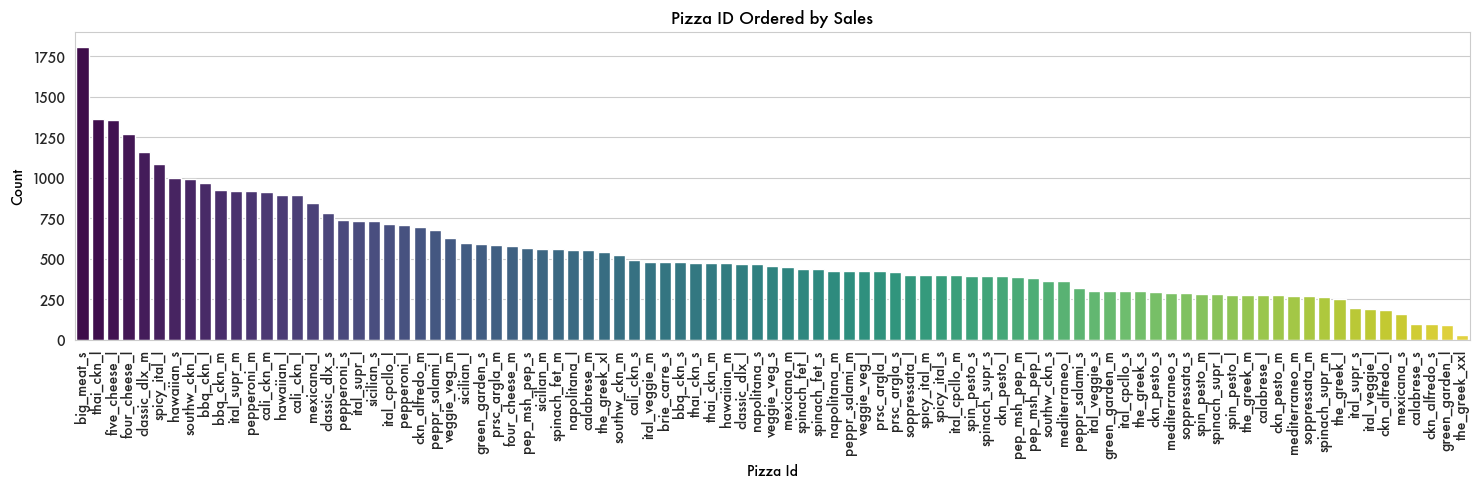

          pizza_id  counts
0       big_meat_s    1811
1       thai_ckn_l    1365
2    five_cheese_l    1359
3    four_cheese_l    1273
4    classic_dlx_m    1159
..             ...     ...
86      mexicana_s     160
87     calabrese_s      99
88   ckn_alfredo_s      96
89  green_garden_l      94
90   the_greek_xxl      28

[91 rows x 2 columns]


In [19]:
pizza_counts = df_combined['pizza_id'].value_counts().reset_index()
pizza_counts.columns = ['pizza_id', 'counts']

plt.rcParams['font.family'] = 'Futura'
# Sort the pizzas from most to least popular
pizza_counts = pizza_counts.sort_values('counts', ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(18, 4))

# Create a viridis color map based on the number of unique pizzas
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(pizza_counts)))

# Use seaborn's barplot for custom order and color, mapping each bar's color individually
sns.barplot(x='pizza_id', y='counts', data=pizza_counts, palette=colors, ax=ax)

plt.xticks(rotation=90)
plt.xlabel("Pizza Id", fontsize=10, color="black")
plt.ylabel("Count", fontsize=10, color="black")
plt.title("Pizza ID Ordered by Sales", color="black")
plt.show()

print(pizza_counts)

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64


/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3153085307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x="quantity", palette="viridis")


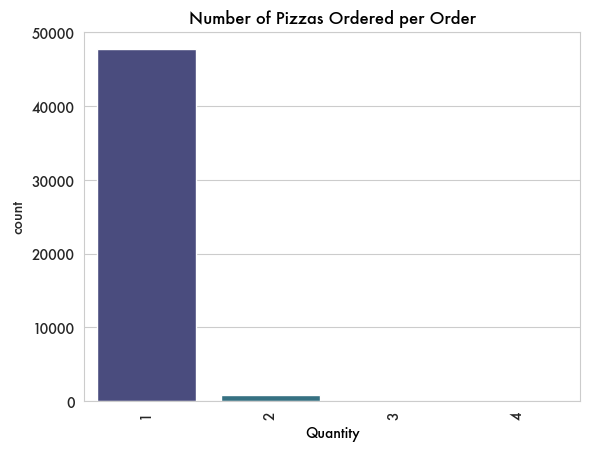

In [20]:
# looking at the number of pizzas ordered per order
print(df_combined.quantity.value_counts())

plt.rcParams['font.family'] = 'Futura'


# Use Seaborn's countplot with the 'viridis' palette
sns.countplot(data=df_combined, x="quantity", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Quantity", fontsize=10, color="black")
plt.title("Number of Pizzas Ordered per Order", color="black")
plt.show()


In [21]:
# calculating the percentage of orders with a quantity of 2, 3, 4
print(df_combined.quantity.value_counts(normalize=True))

# considering that orders with a quantity of 2, 3 and 4 are extremy small, we can drop them from the dataset to simplify the analysis
# however, before that we want ot check if there is a seasonal pattern in orders with quantity of 2, 3 and 4

# Create a DataFrame with only orders of quantity 2, 3, and 4
df_2_3_4 = df_combined[df_combined['quantity'].isin([2, 3, 4])]
print(df_2_3_4)


quantity
1    0.980934
2    0.018573
3    0.000432
4    0.000062
Name: proportion, dtype: float64
       order_details_id  order_id        pizza_id  quantity order_date  \
48                   49        17  mediterraneo_m         2 2015-01-01   
183                 184        78    spicy_ital_l         3 2015-01-02   
211                 212        91       bbq_ckn_l         2 2015-01-02   
222                 223        92     the_greek_m         2 2015-01-02   
245                 246       105      hawaiian_s         2 2015-01-02   
...                 ...       ...             ...       ...        ...   
48461             48462     21285    spin_pesto_s         2 2015-12-31   
48466             48467     21288   classic_dlx_m         3 2015-12-31   
48495             48496     21298      big_meat_s         2 2015-12-31   
48575             48576     21331       bbq_ckn_l         2 2015-12-31   
48601             48602     21343    spicy_ital_l         2 2015-12-31   

             

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/1844890967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_3_4['order_hour'] = df_2_3_4['order_time'].dt.hour
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/1844890967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_3_4['order_hour'] = df_2_3_4['order_time'].dt.hour
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/1844890967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

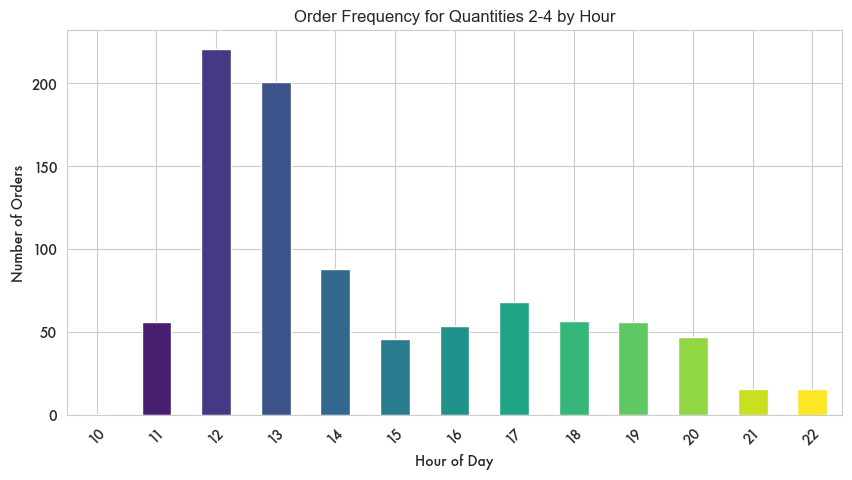

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/1844890967.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_3_4['order_day'] = df_2_3_4['order_date'].dt.day_name()


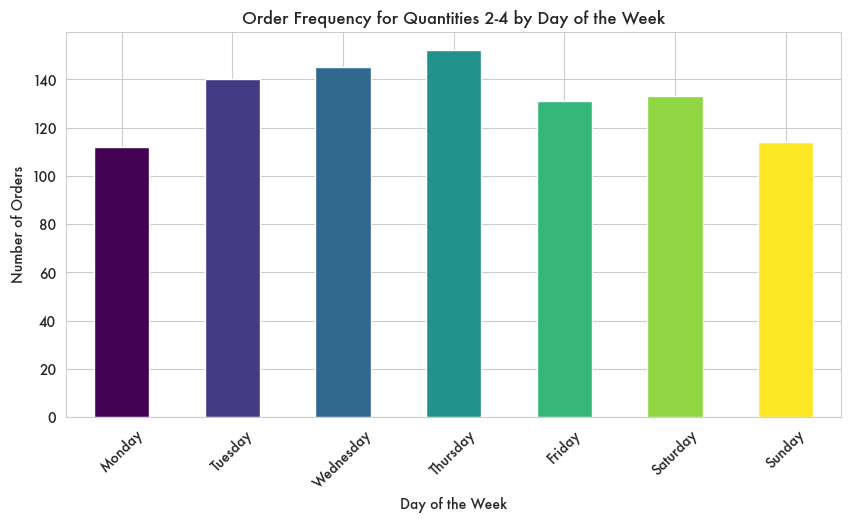

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/1844890967.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_3_4['order_month'] = df_2_3_4['order_date'].dt.month_name()


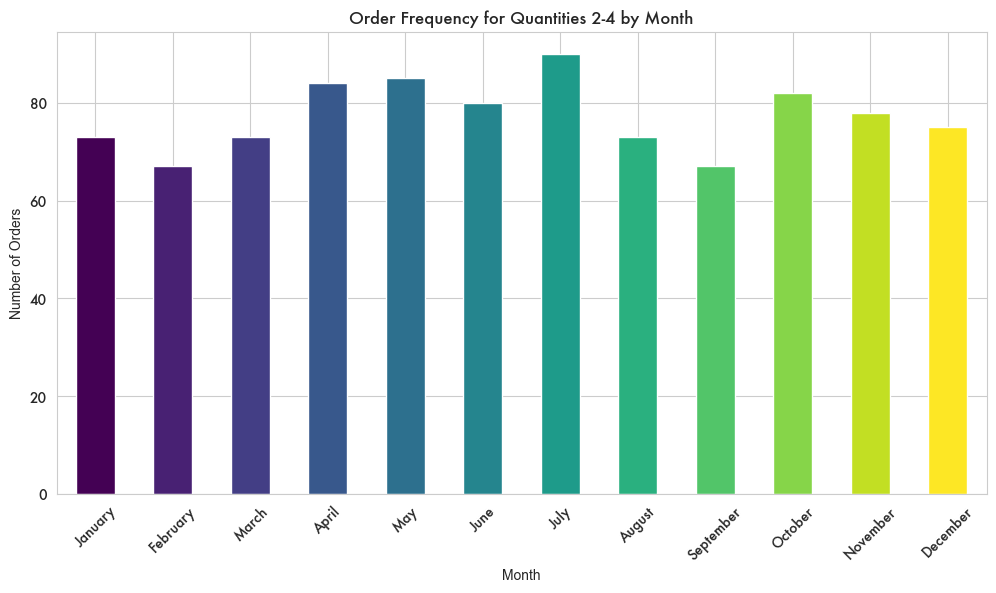

In [22]:
plt.rcParams['font.family'] = 'Futura'

df_2_3_4['order_hour'] = df_2_3_4['order_time'].dt.hour
hourly_distribution = df_2_3_4['order_hour'].value_counts().sort_index()

df_2_3_4['order_hour'] = df_2_3_4['order_time'].dt.hour
hourly_distribution = df_2_3_4['order_hour'].value_counts().sort_index()

# Hourly Distribution
df_2_3_4['order_hour'] = df_2_3_4['order_time'].dt.hour
hourly_distribution = df_2_3_4['order_hour'].value_counts().sort_index()

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, hourly_distribution.size))

plt.figure(figsize=(10, 5))
hourly_distribution.plot(kind='bar', color=colors)
plt.title('Order Frequency for Quantities 2-4 by Hour', fontname='Arial')  # Change fontname as per availability
plt.xlabel('Hour of Day', fontname='Futura')
plt.ylabel('Number of Orders', fontname='Futura')
plt.xticks(rotation=45)
plt.show()

# Day of the week distribution
df_2_3_4['order_day'] = df_2_3_4['order_date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_distribution = df_2_3_4['order_day'].value_counts().reindex(days_order)

# Plotting the day of the week distribution
plt.figure(figsize=(10, 5))
colors_day = plt.cm.viridis(np.linspace(0, 1, len(days_order)))
day_distribution.plot(kind='bar', color=colors_day)
plt.title('Order Frequency for Quantities 2-4 by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Month Distribution
df_2_3_4['order_month'] = df_2_3_4['order_date'].dt.month_name()
month_distribution = df_2_3_4['order_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a color palette
colors_month = plt.cm.viridis(np.linspace(0, 1, 12))  # Fixed to 12 for the months

plt.figure(figsize=(12, 6))
month_distribution.plot(kind='bar', color=colors_month)
plt.title('Order Frequency for Quantities 2-4 by Month', fontname='Futura')
plt.xlabel('Month', fontname='Arial')
plt.ylabel('Number of Orders', fontname='Arial')
plt.xticks(rotation=45)
plt.show()

Since the trends that we perceive for orders with quantity >= 2 are more or less similar to the trend we perceive when we look at the entire data, we can now safely drop these values without skewing our model. Orders in therms of days of the week are all more or less constant, in fact, more constant than when considering order with quantity 1, so it is safe to drop this constant rate of order. The same applies to the order per month. As for the time of the orders, they follow more or less the same trend as when looking at the entire data. so we can safely drop orders with quantity > 2. Additionally, since our goal is to predict order frequency, rather than order quantity, keeping order with quantity >= 2 may introduce noise into our model. Removing these can help in focusing on more frequent, predictable patterns

In [23]:
# Filtering the DataFrame to include only orders with a quantity of 1
df_filtered = df_combined[df_combined['quantity'] == 1]

In [24]:
df_filtered.head()

# Having a look again at all datatypes for all columns
pd.set_option('display.max_rows', None)

print(df_filtered.dtypes)


order_details_id                       int64
order_id                               int64
pizza_id                              object
quantity                               int64
order_date                    datetime64[ns]
order_time                    datetime64[ns]
unit_price                           float64
total_price                          float64
pizza_size                            object
pizza_category                        object
pizza_ingredients                     object
pizza_name                            object
ingredient_list                       object
Alfredo Sauce                          int64
Anchovies                              int64
Artichoke                              int64
Artichokes                             int64
Arugula                                int64
Asiago Cheese                          int64
Bacon                                  int64
Barbecue Sauce                         int64
Barbecued Chicken                      int64
Beef Chuck

In [25]:
# since we have only kept orders with a quantity of 1, we can drop the unit_price column because those will likely be the same as the total_price
# check when unit_price differs from total_price
df_filtered[df_filtered['unit_price'] != df_filtered['total_price']]

# after analysis, we can drop the unit_price column

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,Smoked Gouda Cheese,Soppressata Salami,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,half_hour_bin,order_month


We will not use pizza_id, we simply had a look at the most popular pizzas based on a vast dataset, we will predict the number of ingredients needed and based on the distribttion of the ingredients sold, we will estimate how much of each we need. So we can drop pizza_id. The columns order_id and order_details_id do not add any value to our model, so we can drop them as well. As for the ingredient_list, we can drop it as well since we binarised the values for the ingredients. Since we only kept pizzas with order quantity 1, we can safely drop the unit_price column that will equal the unit_price. We still have to perform one-hot encoding on the pizza_size, the pizza_category (may drop pizza category) and the pizza_name. The pizza_name does not add value to the shop, because if we can predict the peaks in orders and which ingredients will be needed, the pizza name does not add value.

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3131798921.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x="pizza_size", palette="viridis")


pizza_size
L      18105
M      15143
S      13881
XL       536
XXL       28
Name: count, dtype: int64
pizza_size
L      0.379615
M      0.317510
S      0.291049
XL     0.011239
XXL    0.000587
Name: proportion, dtype: float64


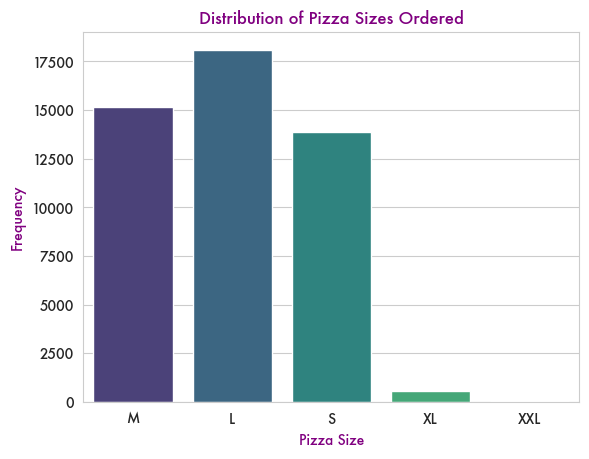

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3131798921.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3131798921.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_day'] = df_filtered['order_date'].dt.day_name()


In [26]:
# show count of pizza sizes ordered in absolute numbers and percentages
print(df_filtered['pizza_size'].value_counts())
print(df_filtered['pizza_size'].value_counts(normalize=True))

# create histogram of distribution of pizza sizes ordered with viridis palette and Futura font
plt.rcParams['font.family'] = 'Futura'
sns.countplot(data=df_filtered, x="pizza_size", palette="viridis")
plt.xlabel("Pizza Size", fontsize=10, color="purple")
plt.ylabel("Frequency", fontsize=10, color="purple")
plt.title("Distribution of Pizza Sizes Ordered", color="purple")
plt.show()

# considering that the pizza sizes of size XL and XXL are extremely small, we can drop them from the dataset to simplify the analysis
# but first we want to check if there is a seasonal pattern in orders with pizza sizes of XL and XXL


# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, hourly_distribution.size))

plt.rcParams['font.family'] = 'Futura'

df_sizes_S_M_L = df_filtered[df_filtered['pizza_size'].isin(['S', 'M', 'L'])]
df_sizes_XL_XXL = df_filtered[df_filtered['pizza_size'].isin(['XL', 'XXL'])]


df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date'])
df_filtered['order_day'] = df_filtered['order_date'].dt.day_name()

# Days and months ordered for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_names_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3275667755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_hour'] = df_filtered['order_time'].dt.hour
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3275667755.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=df_sizes_S_M_L, palette="viridis", ax=axs[0])
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3275667755.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

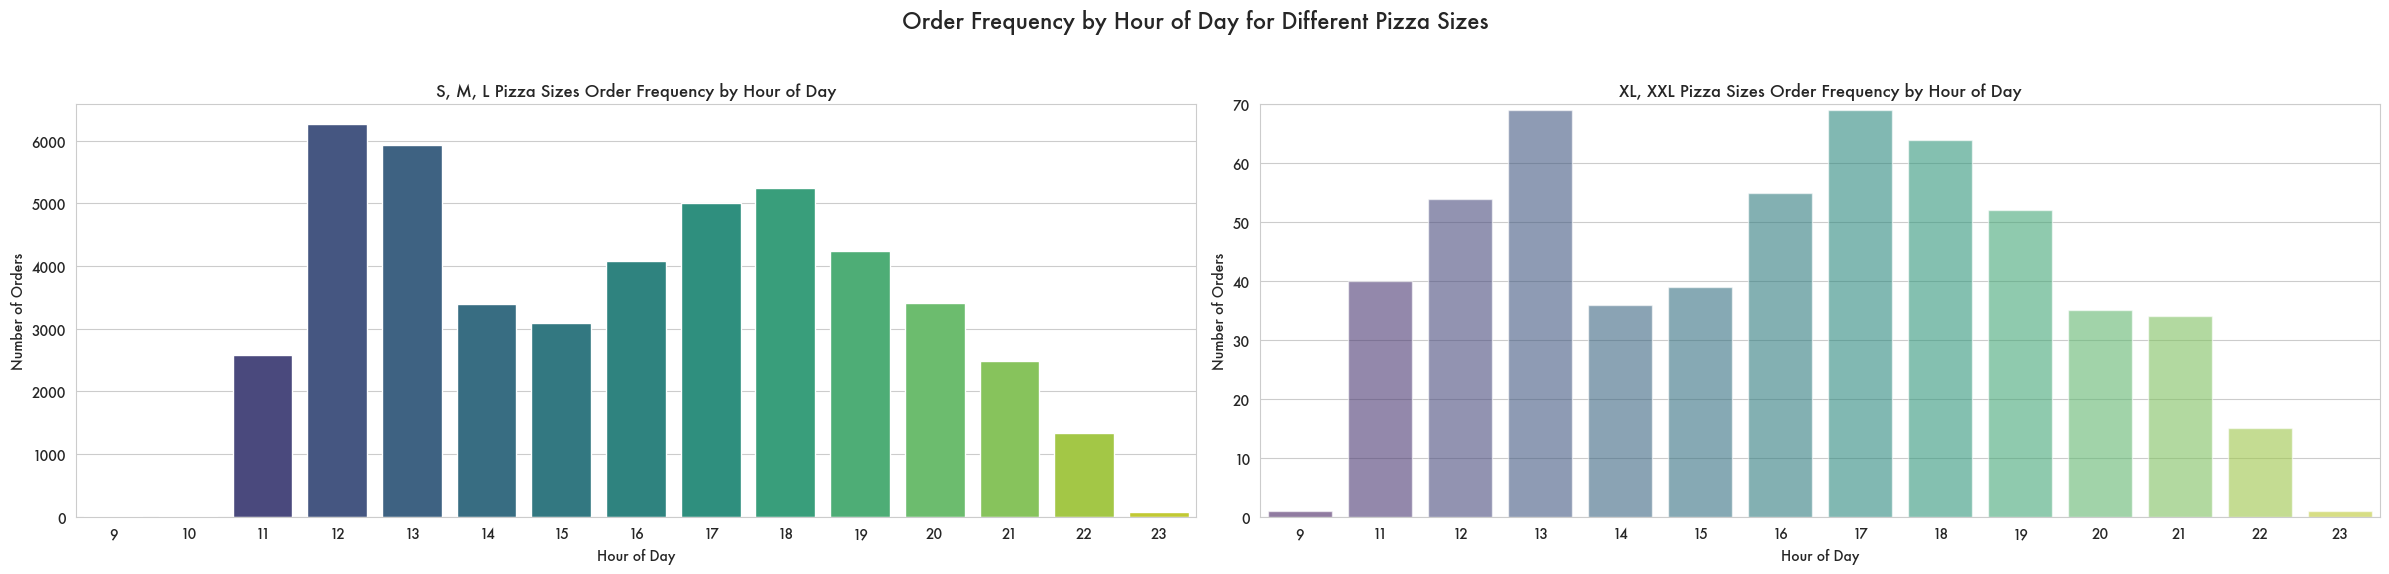

In [27]:
# Setting the global font to Futura
plt.rcParams['font.family'] = 'Futura'

# Create the 'order_hour' column in the df_filtered before filtering
df_filtered['order_hour'] = df_filtered['order_time'].dt.hour

# Filter the dataframes again to ensure they contain the 'order_hour' column
df_sizes_S_M_L = df_filtered[df_filtered['pizza_size'].isin(['S', 'M', 'L'])]
df_sizes_XL_XXL = df_filtered[df_filtered['pizza_size'].isin(['XL', 'XXL'])]

# Setting up the figure and axes for subplots
# Setting up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Plot for S, M, L sizes
sns.countplot(x='order_hour', data=df_sizes_S_M_L, palette="viridis", ax=axs[0])
axs[0].set_title('S, M, L Pizza Sizes Order Frequency by Hour of Day')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Number of Orders')

# Plot for XL, XXL sizes with contrasting color
sns.countplot(x='order_hour', data=df_sizes_XL_XXL, palette="viridis", ax=axs[1], alpha=0.6)
axs[1].set_title('XL, XXL Pizza Sizes Order Frequency by Hour of Day')
axs[1].set_xlabel('Hour of Day')
axs[1].set_ylabel('Number of Orders')

# Specifically zoom in for the XL and XXL sizes plot by adjusting its y-axis limit
max_count_XL_XXL = df_sizes_XL_XXL['order_hour'].value_counts().max()
axs[1].set_ylim(0, max_count_XL_XXL + 1)  # Add some padding to ensure visibility

plt.suptitle('Order Frequency by Hour of Day for Different Pizza Sizes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()


/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/621337619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_day'] = df_filtered['order_date'].dt.day_name()
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/621337619.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_day', data=df_sizes_S_M_L, order=days_order, palette="viridis", ax=axs[0])
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/621337619.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

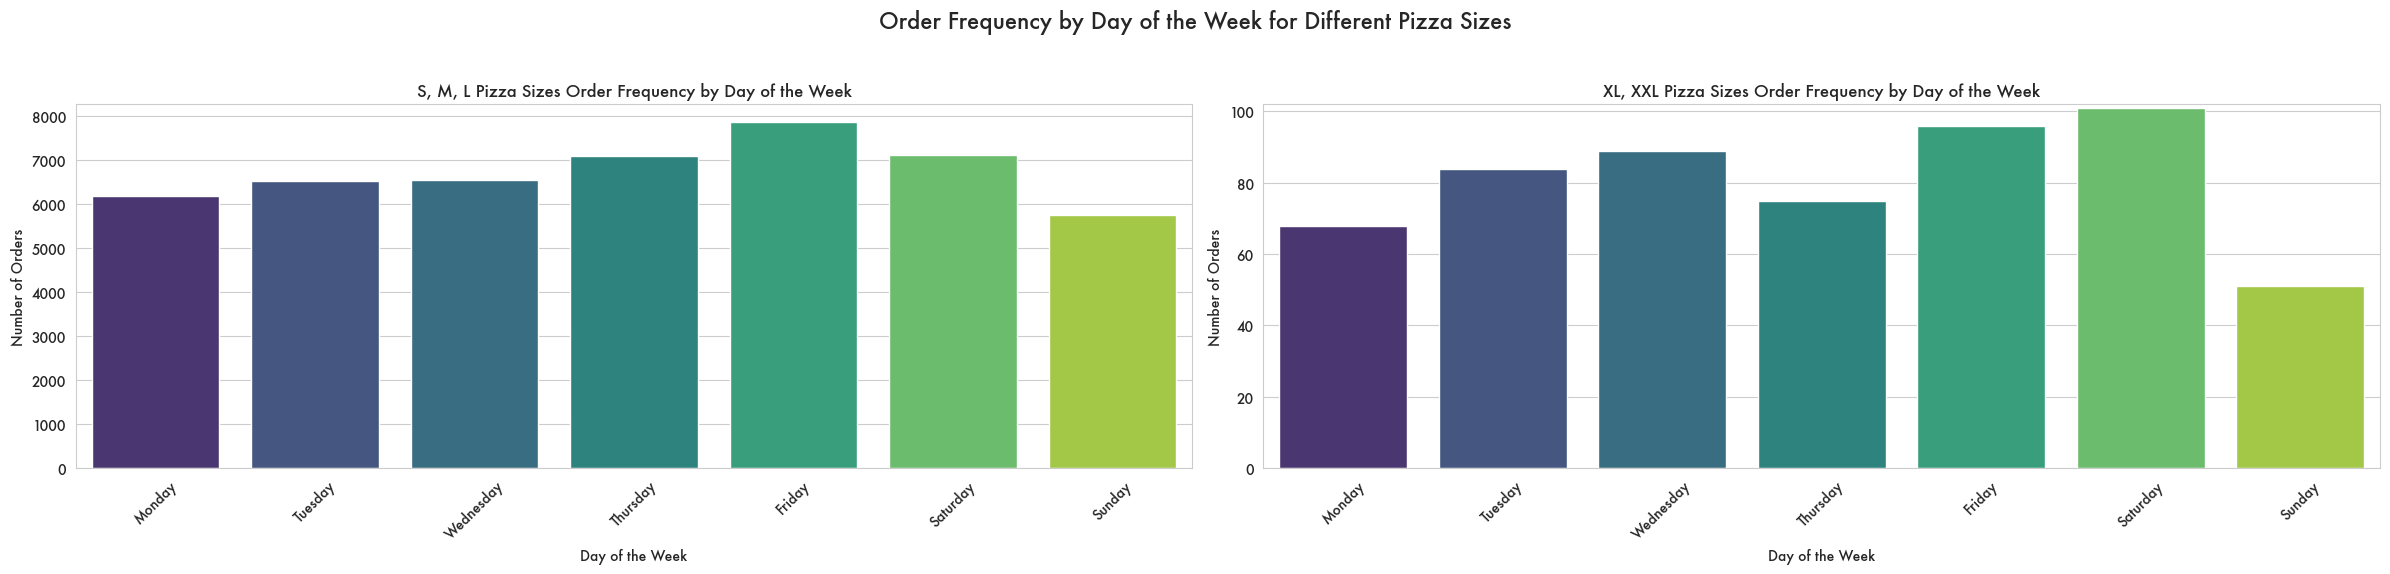

In [28]:
# Ensure 'order_day' column is properly set up
df_filtered['order_day'] = df_filtered['order_date'].dt.day_name()


# Days of the week ordered for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up the figure and axes for subplots, ensuring shared y-axis is disabled for individual zoom
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6), sharey=False)

# Setting the global font to Futura 
plt.rcParams['font.family'] = 'Futura'

# Plot for S, M, L sizes with day of the week distribution
sns.countplot(x='order_day', data=df_sizes_S_M_L, order=days_order, palette="viridis", ax=axs[0])
axs[0].set_title('S, M, L Pizza Sizes Order Frequency by Day of the Week')
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Number of Orders')
axs[0].tick_params(axis='x', rotation=45)

# Plot for XL, XXL sizes with day of the week distribution and specific zoom in
sns.countplot(x='order_day', data=df_sizes_XL_XXL, order=days_order, palette="viridis", ax=axs[1])
# Determine the maximum count for XL, XXL sizes to adjust the y-axis limit for zooming in
max_count_XL_XXL = df_sizes_XL_XXL['order_day'].value_counts()[days_order].max()
axs[1].set_ylim(0, max_count_XL_XXL + 1)  # Adjusting y-axis limits for the XL, XXL plot
axs[1].set_title('XL, XXL Pizza Sizes Order Frequency by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Number of Orders')
axs[1].tick_params(axis='x', rotation=45)

plt.suptitle('Order Frequency by Day of the Week for Different Pizza Sizes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()

/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3274506832.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_month', data=df_sizes_S_M_L, order=month_names_ordered, palette="viridis", ax=axs[0])
/var/folders/8r/6n0k67g52wj61x_p9vthtb940000gn/T/ipykernel_5958/3274506832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_month', data=df_sizes_XL_XXL, order=month_names_ordered, palette="viridis", ax=axs[1], alpha=0.6)


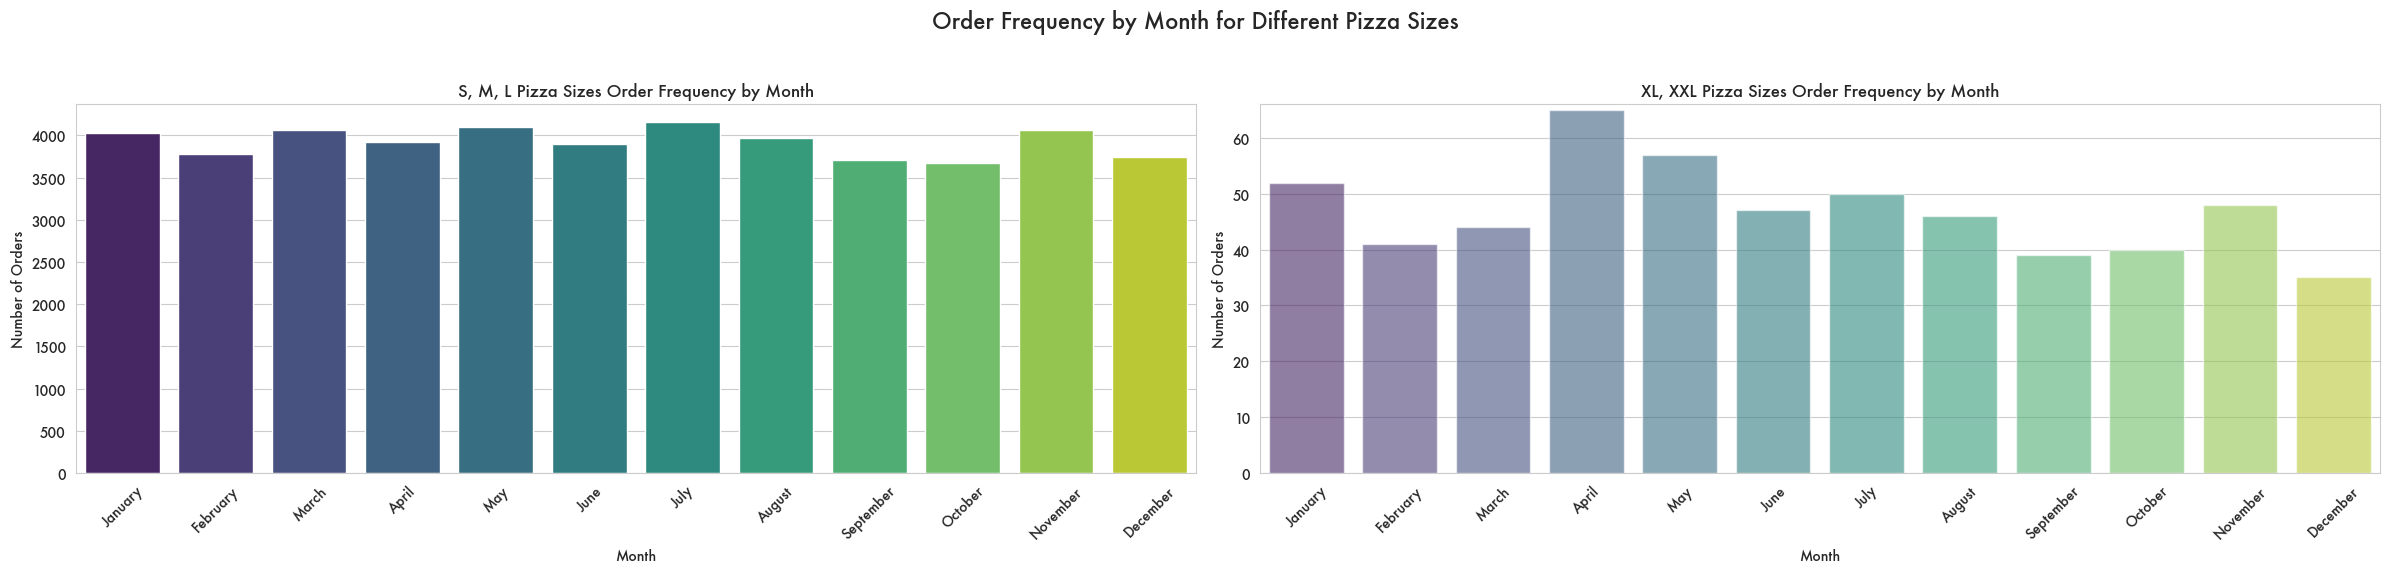

In [29]:
# Month names ordered for plotting
month_names_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Setting up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 6), sharey=False)

# Plot for S, M, L sizes with month distribution
sns.countplot(x='order_month', data=df_sizes_S_M_L, order=month_names_ordered, palette="viridis", ax=axs[0])
axs[0].set_title('S, M, L Pizza Sizes Order Frequency by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Orders')
axs[0].tick_params(axis='x', rotation=45)

# Plot for XL, XXL sizes with month distribution
sns.countplot(x='order_month', data=df_sizes_XL_XXL, order=month_names_ordered, palette="viridis", ax=axs[1], alpha=0.6)
# Specifically zoom in for the XL, XXL sizes plot by adjusting its y-axis limit
max_count_XL_XXL = df_sizes_XL_XXL['order_month'].value_counts().max()
axs[1].set_ylim(0, max_count_XL_XXL + 1)  # Add some padding to ensure visibility
axs[1].set_title('XL, XXL Pizza Sizes Order Frequency by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Orders')
axs[1].tick_params(axis='x', rotation=45)

plt.suptitle('Order Frequency by Month for Different Pizza Sizes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()

Considering the trends for XL and XXL orders are more or less the same for both the moment of teh day, the day of the week and across months as the orders of S,M,L, we can safely drop the orders that contain pizza_size XL or XXL.

In [30]:
# drop pizza_size of XL and XXL
df_filtered = df_filtered[~df_filtered['pizza_size'].isin(['XL', 'XXL'])]

In [31]:
df_cleaned = df_filtered.drop(['order_id', 'order_details_id', 'pizza_id', 'pizza_ingredients', 'pizza_name', 'ingredient_list', 'unit_price'], axis=1)

In [32]:
# create order_month column
df_cleaned['order_month'] = df_cleaned['order_date'].dt.month_name()

In [33]:
df_cleaned.head()

,quantity,order_date,order_time,total_price,pizza_size,pizza_category,Alfredo Sauce,Anchovies,Artichoke,Artichokes,...,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,half_hour_bin,order_month,order_day,order_hour
0,1,2015-01-01,2024-03-20 11:38:36,13.25,M,Classic,0,0,0,0,...,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11
1,1,2015-01-01,2024-03-20 11:57:40,16.00,M,Classic,0,0,0,0,...,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11
2,1,2015-01-01,2024-03-20 11:57:40,18.50,L,Veggie,0,0,0,0,...,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11
3,1,2015-01-01,2024-03-20 11:57:40,20.75,L,Supreme,0,0,0,0,...,0,0,0,0,1,0,2024-03-20 11:30:00,January,Thursday,11
4,1,2015-01-01,2024-03-20 11:57:40,16.00,M,Veggie,0,0,0,0,...,0,0,0,0,1,0,2024-03-20 11:30:00,January,Thursday,11


In [34]:
#binnarise pizza_size

df_cleaned.columns

Index(['quantity', 'order_date', 'order_time', 'total_price', 'pizza_size',
       'pizza_category', 'Alfredo Sauce', 'Anchovies', 'Artichoke',
       'Artichokes', 'Arugula', 'Asiago Cheese', 'Bacon', 'Barbecue Sauce',
       'Barbecued Chicken', 'Beef Chuck Roast', 'Blue Cheese',
       'Brie Carre Cheese', 'Calabrese Salami', 'Capocollo',
       'Caramelized Onions', 'Chicken', 'Chipotle Sauce', 'Chorizo Sausage',
       'Cilantro', 'Coarse Sicilian Salami', 'Corn', 'Eggplant', 'Feta Cheese',
       'Fontina Cheese', 'Friggitello Peppers', 'Garlic', 'Genoa Salami',
       'Goat Cheese', 'Gorgonzola Piccante Cheese', 'Gouda Cheese',
       'Green Olives', 'Green Peppers', 'Italian Sausage', 'Jalapeno Peppers',
       'Kalamata Olives', 'Luganega Sausage', 'Mozzarella Cheese', 'Mushrooms',
       'Nduja Salami', 'Onions', 'Oregano', 'Pancetta',
       'Parmigiano Reggiano Cheese', 'Pears', 'Peperoncini verdi', 'Pepperoni',
       'Pesto Sauce', 'Pineapple', 'Plum Tomatoes', 'Prosciutt

In [35]:
# dtypes with max columns option
pd.set_option('display.max_columns', None)
df_cleaned.dtypes

quantity                               int64
order_date                    datetime64[ns]
order_time                    datetime64[ns]
total_price                          float64
pizza_size                            object
pizza_category                        object
Alfredo Sauce                          int64
Anchovies                              int64
Artichoke                              int64
Artichokes                             int64
Arugula                                int64
Asiago Cheese                          int64
Bacon                                  int64
Barbecue Sauce                         int64
Barbecued Chicken                      int64
Beef Chuck Roast                       int64
Blue Cheese                            int64
Brie Carre Cheese                      int64
Calabrese Salami                       int64
Capocollo                              int64
Caramelized Onions                     int64
Chicken                                int64
Chipotle S

In [36]:
# One-hot encoding for 'pizza_size' and 'pizza_category' is a good idea since we may want to predict the pizza size and category based on other features. This will allow us to use these categorical features in machine learning models.

df_encoded = pd.get_dummies(df_cleaned, columns=['pizza_size', 'pizza_category','order_day', 'order_month'])
# remove duplicate columns in df_combined
df_endoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]
# concatenate df_encoded with df_cleaned and drop the original columns
df_combined = pd.concat([df_cleaned, df_encoded], axis=1)

# drop the original columns and ingredient_list
df_combined = df_combined.drop(['pizza_size', 'pizza_category'], axis=1)

In [37]:
df_combined.head()

,quantity,order_date,order_time,total_price,Alfredo Sauce,Anchovies,Artichoke,Artichokes,Arugula,Asiago Cheese,Bacon,Barbecue Sauce,Barbecued Chicken,Beef Chuck Roast,Blue Cheese,Brie Carre Cheese,Calabrese Salami,Capocollo,Caramelized Onions,Chicken,Chipotle Sauce,Chorizo Sausage,Cilantro,Coarse Sicilian Salami,Corn,Eggplant,Feta Cheese,Fontina Cheese,Friggitello Peppers,Garlic,Genoa Salami,Goat Cheese,Gorgonzola Piccante Cheese,Gouda Cheese,Green Olives,Green Peppers,Italian Sausage,Jalapeno Peppers,Kalamata Olives,Luganega Sausage,Mozzarella Cheese,Mushrooms,Nduja Salami,Onions,Oregano,Pancetta,Parmigiano Reggiano Cheese,Pears,Peperoncini verdi,Pepperoni,Pesto Sauce,Pineapple,Plum Tomatoes,Prosciutto,Prosciutto di San Daniele,Provolone Cheese,Red Onions,Red Peppers,Ricotta Cheese,Romano Cheese,Sliced Ham,Smoked Gouda Cheese,Soppressata Salami,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,half_hour_bin,order_month,order_day,order_hour,quantity,order_date,order_time,total_price,Alfredo Sauce,Anchovies,Artichoke,Artichokes,Arugula,Asiago Cheese,Bacon,Barbecue Sauce,Barbecued Chicken,Beef Chuck Roast,Blue Cheese,Brie Carre Cheese,Calabrese Salami,Capocollo,Caramelized Onions,Chicken,Chipotle Sauce,Chorizo Sausage,Cilantro,Coarse Sicilian Salami,Corn,Eggplant,Feta Cheese,Fontina Cheese,Friggitello Peppers,Garlic,Genoa Salami,Goat Cheese,Gorgonzola Piccante Cheese,Gouda Cheese,Green Olives,Green Peppers,Italian Sausage,Jalapeno Peppers,Kalamata Olives,Luganega Sausage,Mozzarella Cheese,Mushrooms,Nduja Salami,Onions,Oregano,Pancetta,Parmigiano Reggiano Cheese,Pears,Peperoncini verdi,Pepperoni,Pesto Sauce,Pineapple,Plum Tomatoes,Prosciutto,Prosciutto di San Daniele,Provolone Cheese,Red Onions,Red Peppers,Ricotta Cheese,Romano Cheese,Sliced Ham,Smoked Gouda Cheese,Soppressata Salami,Spinach,Sun-dried Tomatoes,Thai Sweet Chilli Sauce,Thyme,Tomatoes,Zucchini,half_hour_bin,order_hour,pizza_size_L,pizza_size_M,pizza_size_S,pizza_category_Chicken,pizza_category_Classic,pizza_category_Supreme,pizza_category_Veggie,order_day_Friday,order_day_Monday,order_day_Saturday,order_day_Sunday,order_day_Thursday,order_day_Tuesday,order_day_Wednesday,order_month_April,order_month_August,order_month_December,order_month_February,order_month_January,order_month_July,order_month_June,order_month_March,order_month_May,order_month_November,order_month_October,order_month_September
0,1,2015-01-01,2024-03-20 11:38:36,13.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11,1,2015-01-01,2024-03-20 11:38:36,13.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2024-03-20 11:30:00,11,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,1,2015-01-01,2024-03-20 11:57:40,16.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11,1,2015-01-01,2024-03-20 11:57:40,16.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2024-03-20 11:30:00,11,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,1,2015-01-01,2024-03-20 11:57:40,18.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,2024-03-20 11:30:00,January,Thursday,11,1,2015-01-01,2024-03-20 11:57:40,18.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,2024-03-20 11:30:00,11,True,False,False,False,False,False,True,False,False,False,False

In [38]:
# Converting strings to lowercase for simplification purposes
for col in df_combined.select_dtypes(include=['object', 'string']).columns:
    df_combined[col] = df_combined[col].astype(str).str.lower()


print(df_combined.head(5))

   quantity order_date          order_time  total_price  Alfredo Sauce  \
0         1 2015-01-01 2024-03-20 11:38:36        13.25              0   
1         1 2015-01-01 2024-03-20 11:57:40        16.00              0   
2         1 2015-01-01 2024-03-20 11:57:40        18.50              0   
3         1 2015-01-01 2024-03-20 11:57:40        20.75              0   
4         1 2015-01-01 2024-03-20 11:57:40        16.00              0   

   Anchovies  Artichoke  Artichokes  Arugula  Asiago Cheese  Bacon  \
0          0          0           0        0              0      0   
1          0          0           0        0              0      1   
2          0          0           0        0              0      0   
3          0          0           0        0              0      0   
4          0          0           0        0              0      0   

   Barbecue Sauce  Barbecued Chicken  Beef Chuck Roast  Blue Cheese  \
0               0                  0                 0         

In [39]:
# count number of rows
print(df_combined.count())

# we end up with a dataset of 47129 rows, which is still a considerable amount of data to train our models on

quantity                      47129
order_date                    47129
order_time                    47129
total_price                   47129
Alfredo Sauce                 47129
Anchovies                     47129
Artichoke                     47129
Artichokes                    47129
Arugula                       47129
Asiago Cheese                 47129
Bacon                         47129
Barbecue Sauce                47129
Barbecued Chicken             47129
Beef Chuck Roast              47129
Blue Cheese                   47129
Brie Carre Cheese             47129
Calabrese Salami              47129
Capocollo                     47129
Caramelized Onions            47129
Chicken                       47129
Chipotle Sauce                47129
Chorizo Sausage               47129
Cilantro                      47129
Coarse Sicilian Salami        47129
Corn                          47129
Eggplant                      47129
Feta Cheese                   47129
Fontina Cheese              

# Pizza category and size may eventually be dropped and not predicted

Calculating the number of pizzas sold each 30 min so that our labels are not only value 1. Otherwise, we will not be able to use it as a feature in our model to make predictions

In [40]:
# drop duplicate keys
df_combined = df_combined.loc[:,~df_combined.columns.duplicated()]

In [41]:
# Convert 'half_hour_bin' to datetime
df_combined['half_hour_bin_transformed'] = pd.to_datetime(df_combined['half_hour_bin'])

In [42]:
# creating quantity_sum column with sum per each 30 minute interval
df_combined['quantity_sum'] = df_combined.groupby('half_hour_bin')['quantity'].transform('sum')

# Drop the temporary column
df_combined.drop('half_hour_bin_transformed', axis=1, inplace=True)

In [43]:
df_combined.columns

Index(['quantity', 'order_date', 'order_time', 'total_price', 'Alfredo Sauce',
       'Anchovies', 'Artichoke', 'Artichokes', 'Arugula', 'Asiago Cheese',
       'Bacon', 'Barbecue Sauce', 'Barbecued Chicken', 'Beef Chuck Roast',
       'Blue Cheese', 'Brie Carre Cheese', 'Calabrese Salami', 'Capocollo',
       'Caramelized Onions', 'Chicken', 'Chipotle Sauce', 'Chorizo Sausage',
       'Cilantro', 'Coarse Sicilian Salami', 'Corn', 'Eggplant', 'Feta Cheese',
       'Fontina Cheese', 'Friggitello Peppers', 'Garlic', 'Genoa Salami',
       'Goat Cheese', 'Gorgonzola Piccante Cheese', 'Gouda Cheese',
       'Green Olives', 'Green Peppers', 'Italian Sausage', 'Jalapeno Peppers',
       'Kalamata Olives', 'Luganega Sausage', 'Mozzarella Cheese', 'Mushrooms',
       'Nduja Salami', 'Onions', 'Oregano', 'Pancetta',
       'Parmigiano Reggiano Cheese', 'Pears', 'Peperoncini verdi', 'Pepperoni',
       'Pesto Sauce', 'Pineapple', 'Plum Tomatoes', 'Prosciutto',
       'Prosciutto di San Daniele',

In [44]:
# creating a variable that sums the number of ingredients per pizza (row)
df_combined['num_ingredients'] = df_combined[['Alfredo Sauce', 'Anchovies', 'Artichoke', 'Artichokes', 'Arugula', 'Asiago Cheese', 'Bacon', 'Barbecue Sauce', 'Barbecued Chicken', 'Beef Chuck Roast', 'Blue Cheese', 'Brie Carre Cheese', 'Calabrese Salami', 'Capocollo', 'Caramelized Onions', 'Chicken', 'Chipotle Sauce', 'Chorizo Sausage', 'Cilantro', 'Coarse Sicilian Salami', 'Corn', 'Eggplant', 'Feta Cheese', 'Fontina Cheese', 'Friggitello Peppers', 'Garlic', 'Genoa Salami', 'Goat Cheese', 'Gorgonzola Piccante Cheese', 'Gouda Cheese', 'Green Olives', 'Green Peppers', 'Italian Sausage', 'Jalapeno Peppers', 'Kalamata Olives', 'Luganega Sausage', 'Mozzarella Cheese', 'Mushrooms', 'Nduja Salami', 'Onions', 'Oregano', 'Pancetta', 'Parmigiano Reggiano Cheese', 'Pears', 'Peperoncini verdi', 'Pepperoni', 'Pesto Sauce', 'Pineapple', 'Plum Tomatoes', 'Prosciutto', 'Prosciutto di San Daniele', 'Provolone Cheese', 'Red Onions', 'Red Peppers', 'Ricotta Cheese', 'Romano Cheese', 'Sliced Ham', 'Smoked Gouda Cheese', 'Soppressata Salami', 'Spinach', 'Sun-dried Tomatoes', 'Thai Sweet Chilli Sauce', 'Thyme', 'Tomatoes', 'Zucchini']].sum(axis=1)

## Saving the processed features into another table of the database

In [45]:
# Save the processed features into another table
df_combined.to_sql('features_data', engine, if_exists='replace', index=False)
print("Feature set is loaded into SQLite database successfully.")

Feature set is loaded into SQLite database successfully.


## Model Training

For our initial model training, we will not look at order prices and specific ingredients.

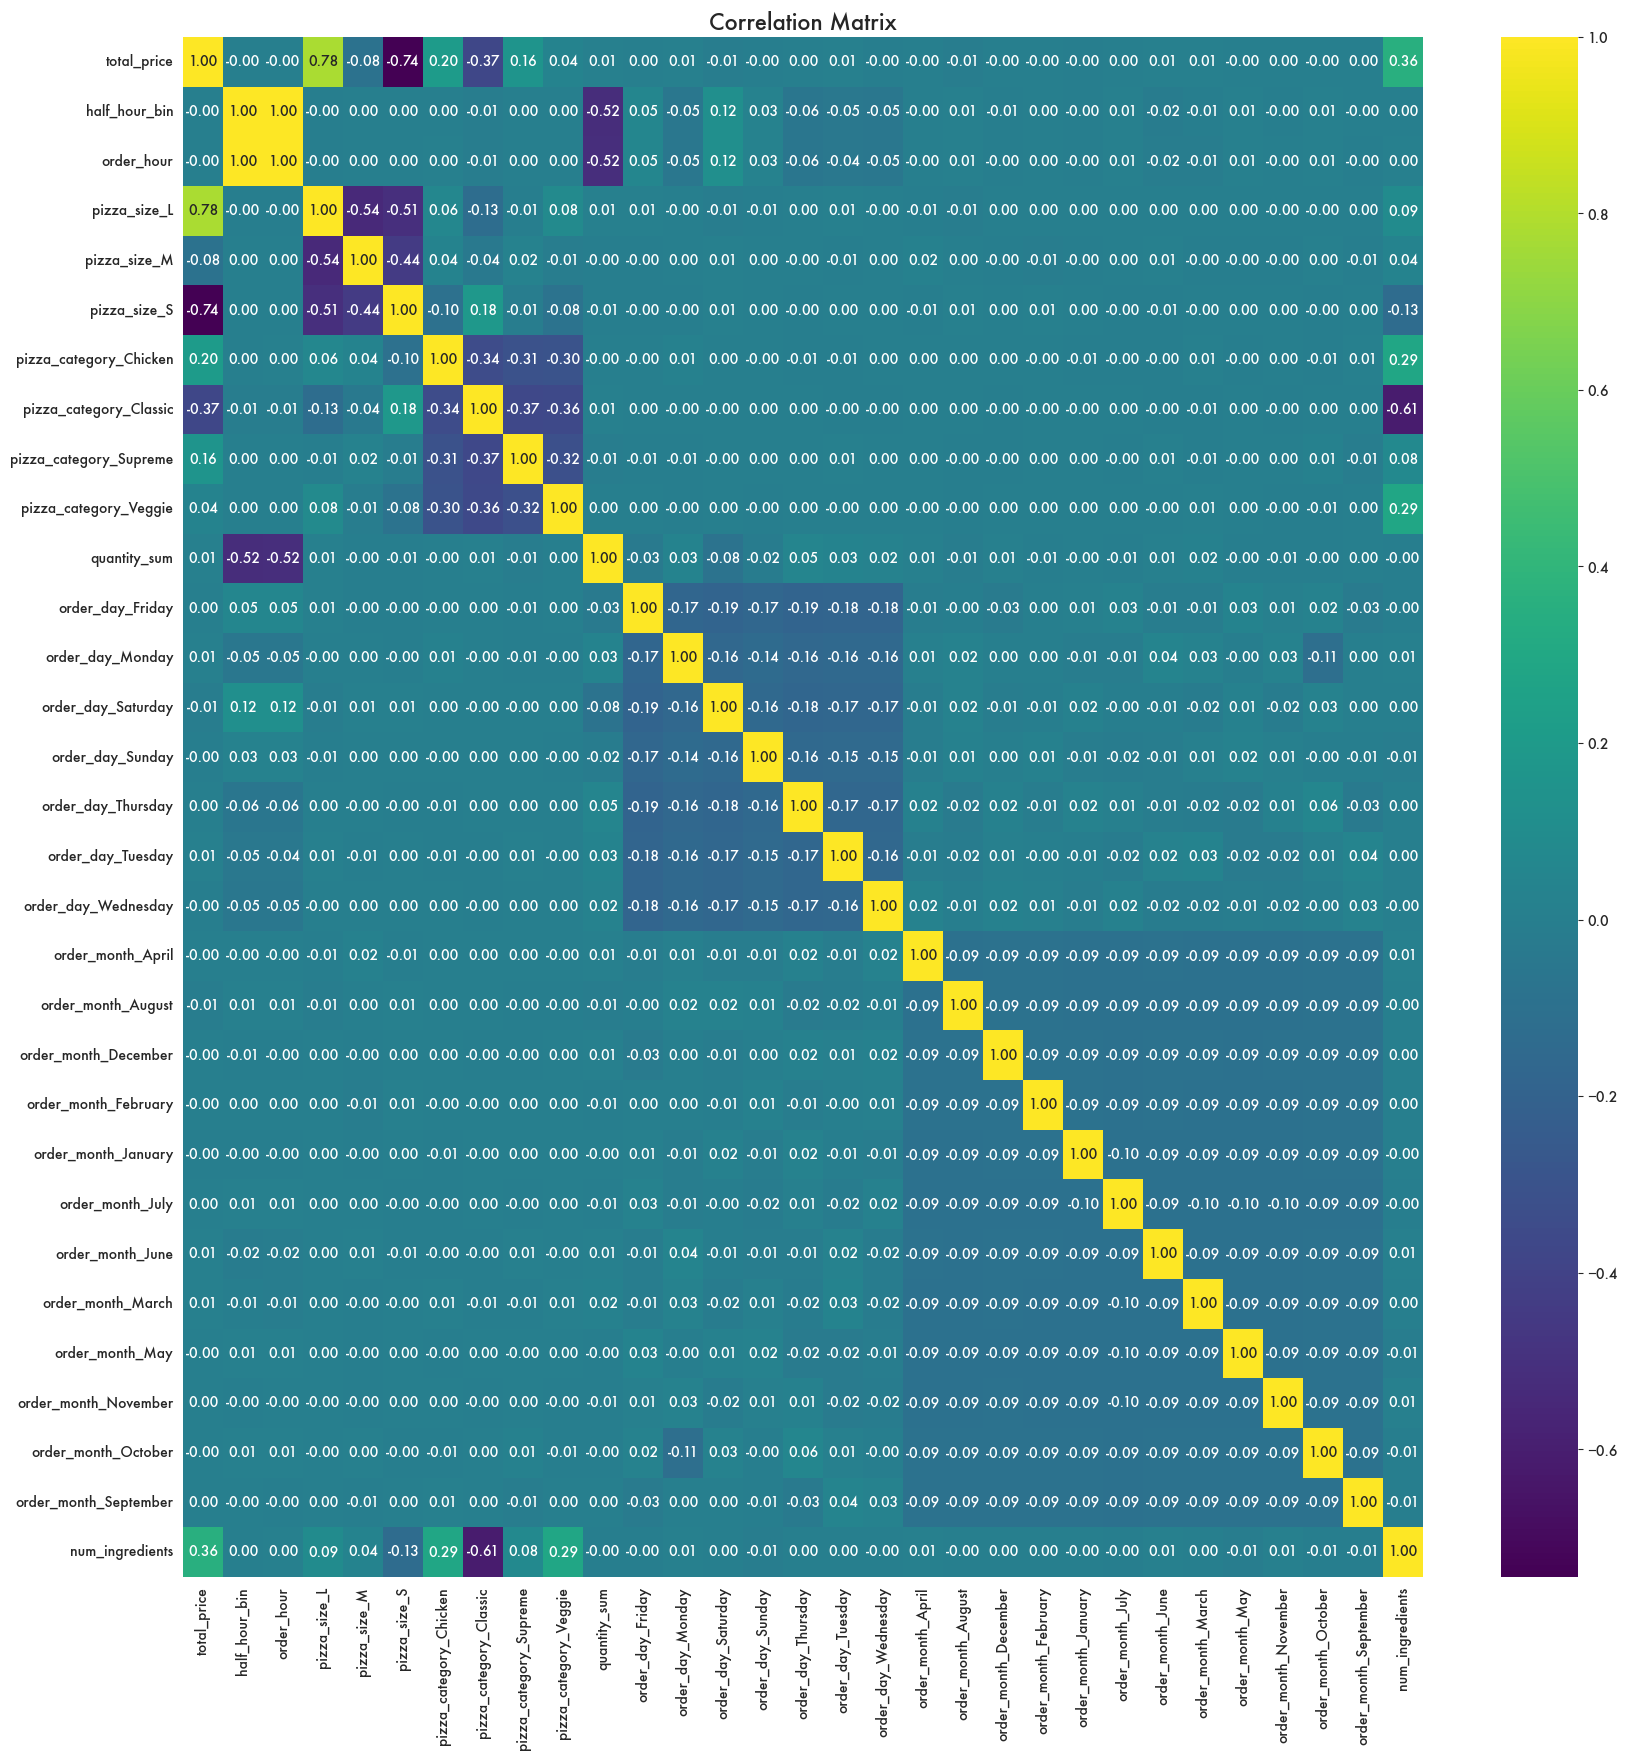

In [46]:
# creating a new df to see correlations between 'total_price', 'half_hour_bin', 'order_month', 'order_day', 'order_hour', 'pizza_size_L', 'pizza_size_M', 'pizza_size_S', 'pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie', 'hour', 'minute_bin','quantity_sum'

df_corr = df_combined[['total_price', 'half_hour_bin', 'order_hour', 'pizza_size_L', 'pizza_size_M', 'pizza_size_S', 'pizza_category_Chicken', 'pizza_category_Classic','pizza_category_Supreme', 'pizza_category_Veggie', 'quantity_sum','order_day_Friday', 'order_day_Monday', 'order_day_Saturday', 'order_day_Sunday', 'order_day_Thursday', 'order_day_Tuesday', 'order_day_Wednesday', 'order_month_April',	'order_month_August', 'order_month_December', 'order_month_February', 'order_month_January', 'order_month_July', 'order_month_June', 'order_month_March', 'order_month_May', 'order_month_November', 'order_month_October', 'order_month_September','num_ingredients']]

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [47]:
#print all the columns and types
print(df_combined.dtypes)

quantity                               int64
order_date                    datetime64[ns]
order_time                    datetime64[ns]
total_price                          float64
Alfredo Sauce                          int64
Anchovies                              int64
Artichoke                              int64
Artichokes                             int64
Arugula                                int64
Asiago Cheese                          int64
Bacon                                  int64
Barbecue Sauce                         int64
Barbecued Chicken                      int64
Beef Chuck Roast                       int64
Blue Cheese                            int64
Brie Carre Cheese                      int64
Calabrese Salami                       int64
Capocollo                              int64
Caramelized Onions                     int64
Chicken                                int64
Chipotle Sauce                         int64
Chorizo Sausage                        int64
Cilantro  

### Model 1: predicting the quantity sold based on the time of the day

In [48]:
print(df_combined['half_hour_bin'].head())

0   2024-03-20 11:30:00
1   2024-03-20 11:30:00
2   2024-03-20 11:30:00
3   2024-03-20 11:30:00
4   2024-03-20 11:30:00
Name: half_hour_bin, dtype: datetime64[ns]


In [49]:
# Directly extracting hour and minute_bin without reconversion
df_combined['hour'] = df_combined['half_hour_bin'].dt.hour
df_combined['minute_bin'] = np.where(df_combined['half_hour_bin'].dt.minute < 30, 0, 1)  # 0 for first half, 1 for second half

In [50]:
# Cyclical encoding for 'hour'
df_combined['hour_sin'] = np.sin(2 * np.pi * df_combined['hour'] / 24)
df_combined['hour_cos'] = np.cos(2 * np.pi * df_combined['hour'] / 24)

In [51]:
# Prepare the data for machine learning
# Since 'order_day' and 'order_month' have been one-hot encoded, their dummy columns need to be included in X
# Extract column names for the one-hot encoded 'order_day' and 'order_month' variables
combined_order_day_columns = [col for col in df_combined.columns if col.startswith('order_day_')]
combined_order_month_columns = [col for col in df_combined.columns if col.startswith('order_month_')]

In [52]:
# Define the features (X) and target variable (y)
x_columns = ['order_hour'] + combined_order_day_columns + combined_order_month_columns
x = df_combined[x_columns]
y = df_combined['quantity_sum']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Train the model
log_reg.fit(x_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(x_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4324209632930193


In [53]:
# Saving the hour_sin and hour_cos columns to the DB in a new table: sales_data_processed
db_uri = "sqlite:///pizza_sales.db"

# Create the database engine
engine = create_engine(db_uri)

# Save the DataFrame to the SQLite database, replacing the table if it already exists
df_combined.to_sql('sales_data_processed', engine, if_exists='replace', index=False)
print("Dataframe is loaded into SQLite database successfully.")

Dataframe is loaded into SQLite database successfully.


In [54]:
#training on each half an hour interval
x_columns = ['hour_sin', 'hour_cos'] + combined_order_day_columns + combined_order_month_columns

x = df_combined[x_columns]
y = df_combined['quantity_sum']

In [55]:
# Create a logistic regression model with a different solver
log_reg = LogisticRegression(max_iter=10000, solver='saga')

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred = log_reg.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy (per half an hour):', accuracy)


Accuracy (per half an hour): 0.4335879482283047


In [56]:
# initialise a linear regression model
linear_model = LinearRegression()

# fit the model
linear_model.fit(x_train, y_train)

# predict the labels
y_pred = linear_model.predict(x_test)

# calculate the accuracy
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.25131611401667286


In [57]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.8884688482166189


In [58]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 52425.90734737984
Mean Absolute Error: 157.65455697157117


In [59]:
# finding the optimal Random Forest Regressor parameters with GridSearchCV

# Create a dictionary of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_index_)
print(grid_search.cv_results_)
print(grid_search.n_splits_)

# print test accuracy of the best model
best_rf_model_GS = grid_search.best_estimator_
y_pred = best_rf_model_GS.predict(x_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# print training accuracy of the best model
y_pred_train = best_rf_model_GS.predict(x_train)
accuracy_train = r2_score(y_train, y_pred_train)
print('Accuracy (Training Set):', accuracy_train)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
0.8915707111392891
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)
14
{'mean_fit_time': array([1.08139531, 2.15570299, 3.31392431, 1.10633572, 2.19677416,
       3.27054747, 1.10660752, 2.18075975, 3.26499319, 1.09884691,
       2.1825939 , 3.26189073, 1.0904034 , 2.15064947, 3.22952501,
       1.07717522, 2.15245422, 3.31246106, 1.14522966, 2.22786768,
       3.31865597, 1.12992001, 2.26419973, 3.40251875, 1.12186249,
       2.25986195, 3.32243323, 1.48194162, 2.94276619, 4.40050205,
       1.45190175, 2.89974189, 4.38603441, 1.45337407, 2.93101128,
       4.4351418 , 1.47862546, 2.99174706, 4.39500968, 1.48741635,
       2.96281727, 4.4515268 , 1.47010549, 2.93476137, 4.39348237,
       1.46453508, 2.92823497, 4.39621496, 1.46653954, 2.93320719,
       4.45366573, 1.53715531, 3.01455172, 4.47662036, 1.48518062,
   

Doing a GridSearch to find the best hyperparameters did not yield significantly better results than our initial Random Forest regressor. The results were very slightly better.

In [60]:
# calculate the feature importances with their names based on the original Random Forest Regressor model
feature_importances = best_rf_model_GS.feature_importances_
feature_names = x_train.columns

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

print(feature_importances_df)

                  feature  importance
0              order_hour    0.990569
1        order_day_Friday    0.000698
2        order_day_Monday    0.000427
3      order_day_Saturday    0.001605
4        order_day_Sunday    0.001362
5      order_day_Thursday    0.000481
6       order_day_Tuesday    0.000443
7     order_day_Wednesday    0.000817
8       order_month_April    0.000443
9      order_month_August    0.000291
10   order_month_December    0.000444
11   order_month_February    0.000214
12    order_month_January    0.000331
13       order_month_July    0.000195
14       order_month_June    0.000199
15      order_month_March    0.000214
16        order_month_May    0.000216
17   order_month_November    0.000262
18    order_month_October    0.000344
19  order_month_September    0.000447


## Saving the model using joblib

In [61]:
dump(best_rf_model_GS, 'best_rf_model.joblib')
print('Model saved to best_rf_model.joblib')

Model saved to best_rf_model.joblib


In [62]:
# whenever the model needs to be used, we can load it from the file
# Load the model from the file
loaded_model = load('best_rf_model.joblib')

In [63]:
# performing a RandomizedSearchCV
# Create a dictionary of hyperparameters to search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=100, cv=3, random_state=42)

# Fit the random search to the data
random_search.fit(x_train, y_train)

# Print the best parameters found
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)
print(random_search.best_index_)
print(random_search.cv_results_)
print(random_search.n_splits_)

# print test accuracy of the best model
best_rf_model_RSV = random_search.best_estimator_
y_pred = best_rf_model_RSV.predict(x_test)
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# print training accuracy of the best model
y_pred_train = best_rf_model_RSV.predict(x_train)
accuracy_train = r2_score(y_train, y_pred_train)
print('Accuracy (Training Set):', accuracy_train)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
0.8915694459083688
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300, random_state=42)
28
{'mean_fit_time': array([4.50046627, 3.01111102, 1.50254782, 3.03861006, 3.37037786,
       4.48498503, 1.50504955, 4.48900874, 1.094829  , 2.94343066,
       1.47053536, 1.4654007 , 4.42977381, 4.37677828, 1.44904923,
       1.47171577, 3.0029668 , 1.5106283 , 4.53964003, 3.00465862,
       4.4343334 , 1.46925879, 1.47689724, 2.91375192, 4.55665175,
       1.48721035, 2.96024561, 1.46155175, 3.26883586, 1.47138373,
       1.47395682, 1.49076668, 1.09304166, 2.97671795, 2.23852889,
       1.47466437, 1.49608668, 1.47385414, 1.46442691, 2.95508814,
       4.41239047, 1.46281568, 4.38841383, 4.41934816, 1.47513048,
       2.94871012, 2.92965825, 4.43205897, 4.38851015, 2.90380708,
       1.45265977, 1.46874928, 4.40182177, 4.42018795, 1.4671944 ,
 

The RandomisedSearchCV performed exactly the same as our GridSearchCV because the same optimal parameters were found, hence, the same accuracies are achieved.

In [64]:
# train an XGBoost Regressor

# Create an XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Calculate the accuracy of test
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# calculate the accuracy of the training set
y_pred_train = xgb_model.predict(x_train)
accuracy_train = r2_score(y_train, y_pred_train)
print('Accuracy (Training Set):', accuracy_train)

Accuracy: 0.8888103028842121
Accuracy (Training Set): 0.8978098595125995


In [65]:
# training a random forest regressor with only x being the hour_sin and hour_cos and y being the quantity_sum
x_columns = ['hour_sin', 'hour_cos']
x = df_combined[x_columns]
y = df_combined['quantity_sum']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate the accuracy of test
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# calculate the accuracy of the training set
y_pred_train = rf_model.predict(x_train)
accuracy_train = r2_score(y_train, y_pred_train)
print('Accuracy (Training Set):', accuracy_train)

Accuracy: 0.8818492928083257
Accuracy (Training Set): 0.8862825053775364


The accuracy of the first model is signficantly high with a RandomForestRegressor. The linear regressor and the logistic regression are not good predictors for the quantity sold per half an hour. The XG Boost model performs slightly worse than the Random Forest regressor. Training a RF Regressor with only the time of the day also performs slightly worse than our initial RF Regressor. Meaning the day of the weak and the month help us better predict the quantity sold per half an hour interval. We can also say that there is likely no overfitting, since the accuracy of our training set is slightly higher that the accuracy of the test set.

### Model 2: Predicting total_price based on pizza size and pizza category

Since the correlations between pizza's having size S and L, and categories Chicken, Classic and Supreme having cosiderably significant correlations, we will now train a model to predict the total price of the order. We also notice that the time of the day, week, month and the quantity sum per half an hour do not correlate with the total price of the orders, which is an interesting insight.

In [66]:
# training a random forest regressor with x being pizza_size_S, pizza_size_L, pizza_category_Chicken, pizza_category_Classic, pizza_category_Supreme and y being total_price
x_columns = ['pizza_size_S', 'pizza_size_L', 'pizza_category_Chicken', 'pizza_category_Classic', 'pizza_category_Supreme']
x = df_combined[x_columns]
y = df_combined['total_price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate the R-squared score for test set
r2_test = r2_score(y_test, y_pred)
print('R-squared (Test Set):', r2_test)

# Calculate the R-squared score for training set
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (Training Set):', r2_train)

# Calculate MSE and MAE for test set
rf_mse_test = mean_squared_error(y_test, y_pred)
rf_mae_test = mean_absolute_error(y_test, y_pred)

print('MSE (Test Set):', rf_mse_test)
print('MAE (Test Set):', rf_mae_test)

R-squared (Test Set): 0.8400232729758788
R-squared (Training Set): -449784.78571174515
MSE (Test Set): 1.9428967051162302
MAE (Test Set): 0.7574129700204918


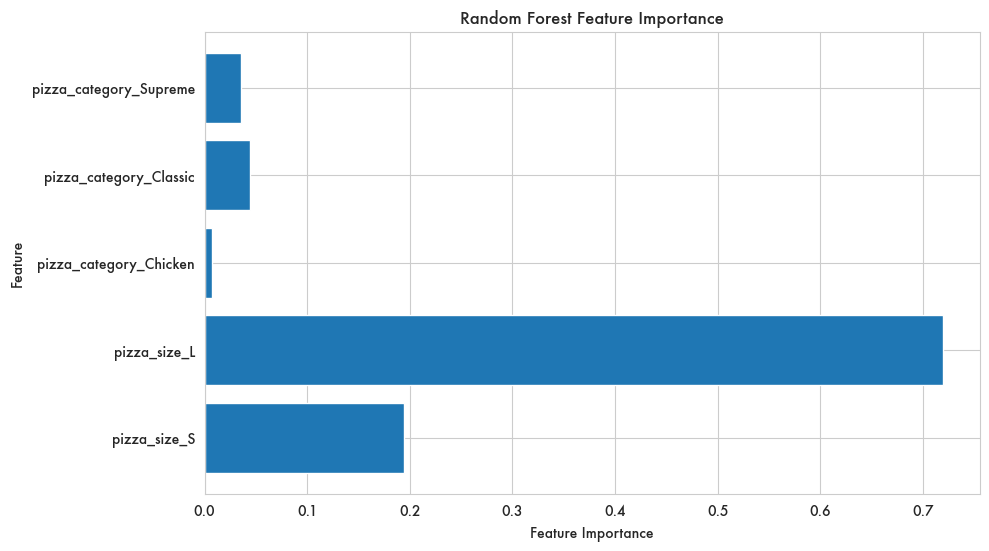

In [67]:
#Visualize feature importance for Random Forest model
plt.figure(figsize=(10, 6))
plt.barh(x.columns, rf_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [68]:
# train a linear regression model with x being pizza_size_S, pizza_size_L, pizza_category_Chicken, pizza_category_Classic, pizza_category_Supreme and y being total_price

lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions
y_pred = lr_model.predict(x_test)

# Calculate R-squared for the test set
r2 = r2_score(y_test, y_pred)
print('R-squared (Test Set):', r2)

# Calculate R-squared for the training set
y_pred_train = lr_model.predict(x_train)
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (Training Set):', r2_train)

# Calculate MSE and MAE for test set
lr_mse_test = mean_squared_error(y_test, y_pred)
lr_mae_test = mean_absolute_error(y_test, y_pred)

print('MSE (Test Set):', lr_mse_test)
print('MAE (Test Set):', lr_mae_test)

R-squared (Test Set): 0.8346150352248828
R-squared (Training Set): 0.8354676399275931
MSE (Test Set): 2.008579054682684
MAE (Test Set): 0.8351948493427805


In [69]:
# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model using the training set
lin_reg.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

# The coefficients
print('Coefficients:', lin_reg.coef_)

# The mean squared error for the testing set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error (MSE) on test set: %.2f' % mse)

# The coefficient of determination (R^2) for the testing set
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2) on test set: %.2f' % r2)

# Calculate the accuracy of the training set as well
y_pred_train = lin_reg.predict(x_train)

# The mean squared error for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean squared error (MSE) on training set: %.2f' % mse_train)

# The coefficient of determination (R^2) for the training set
r2_train = r2_score(y_train, y_pred_train)
print('Coefficient of determination (R^2) on training set: %.2f' % r2_train)

# accuracy of the model
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# calculate the accuracy of the training set
y_pred_train = lin_reg.predict(x_train)
accuracy_train = r2_score(y_train, y_pred_train)
print('Accuracy (Training Set):', accuracy_train)


Coefficients: [-3.31455512  3.80975226  1.06844274 -0.96068934  1.22338073]
Mean squared error (MSE) on test set: 2.01
Coefficient of determination (R^2) on test set: 0.83
Mean squared error (MSE) on training set: 1.99
Coefficient of determination (R^2) on training set: 0.84
Accuracy: 0.8346150352248828
Accuracy (Training Set): 0.8354676399275931


In [70]:
# Initialize the XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = xgb_model.predict(x_test)

# Calculate the mean squared error for the testing set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error (MSE) on test set: %.2f' % mse)

# Calculate the coefficient of determination (R^2) for the testing set
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2) on test set: %.2f' % r2)

# Make predictions using the training set
y_pred_train = xgb_model.predict(x_train)

# Calculate the mean squared error for the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean squared error (MSE) on training set: %.2f' % mse_train)

# Calculate the coefficient of determination (R^2) for the training set
r2_train = r2_score(y_train, y_pred_train)
print('Coefficient of determination (R^2) on training set: %.2f' % r2_train)


Mean squared error (MSE) on test set: 1.94
Coefficient of determination (R^2) on test set: 0.84
Mean squared error (MSE) on training set: 1.92
Coefficient of determination (R^2) on training set: 0.84


<Figure size 1000x600 with 0 Axes>

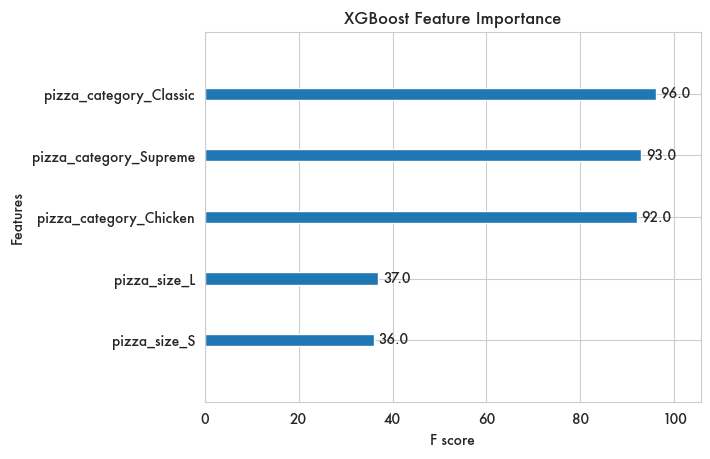

In [71]:
# Visualize feature importance for XGBoost model
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.show()

In this case, the XG Boost algorithm is the most suited to predict the total price of an order based on the pizza size and category. The accuracy of the model is 0.84, which is very high. The accuracy of the training set is 0.84, which is also very high. This means that the model is able to predict the total price of an order based on the pizza size and category with a high degree of accuracy.

### Model 3: predicting the number of ingredients needed (and the distribution of ingredients) based on the quantity sold ecah 30 minutes of the day

Since we binarise the number of ingredients present in each order (each row), we can predict per half hour how many ingredients we will need. We will predict the number of ingredients needed based on the variables that showed the highest correlation values in the correlation matrix based. That is, total_price, *pizza_size_L*, *pizza_size_S*, pizza_category_Chicken, pizza_category_Classic, *pizza_category_Supreme*, pizza_category_Veggie. (These are a good way to predict, since these 4 categories comprise all of the different existing pizzas, so is they help us predict the number of ingredients)

In [72]:
# x = total_price, *pizza_size_S*, pizza_category_Chicken, pizza_category_Classic, *pizza_category_Supreme*, pizza_category_Veggie

x = df_combined[['total_price', 'pizza_size_L', 'pizza_size_S','pizza_category_Chicken', 'pizza_category_Classic', 'pizza_category_Supreme', 'pizza_category_Veggie']]
y = df_combined['num_ingredients']

In [73]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate the mean squared error of test set
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the R-squared score of test set
r2 = r2_score(y_test, y_pred)
print('R-squared (Test Set):', r2)

# Calculate the mean squared error of training set
y_pred_train = rf_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error (Training Set):', mse_train)

# Calculate the R-squared score of training set
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (Training Set):', r2_train)

Mean Squared Error (MSE): 0.8692483128938737
R-squared (Test Set): 0.6388674331120732
Mean Squared Error (Training Set): 0.8613545773198732
R-squared (Training Set): 0.6511687135926603


In [74]:
# Selecting features with higher correlations
x = df_combined[['total_price', 'pizza_category_Chicken', 'pizza_category_Classic', 'pizza_category_Veggie']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred = rf_model.predict(x_test)

# Calculate the mean squared error of test set
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the R-squared score of test set
r2 = r2_score(y_test, y_pred)
print('R-squared (Test Set):', r2)

# Calculate the mean squared error of training set
y_pred_train = rf_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error (Training Set):', mse_train)

# Calculate the R-squared score of training set
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (Training Set):', r2_train)


Mean Squared Error (MSE): 0.8692483128938737
R-squared (Test Set): 0.6388674331120732
Mean Squared Error (Training Set): 0.8613545773198732
R-squared (Training Set): 0.6511687135926603


In [75]:
# train an XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Calculate the mean squared error of test set
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the R-squared score of test set
r2 = r2_score(y_test, y_pred)
print('R-squared (Test Set):', r2)

# Calculate the mean squared error of training set
y_pred_train = xgb_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error (Training Set):', mse_train)

# Calculate the R-squared score of training set
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (Training Set):', r2_train)


Mean Squared Error (MSE): 0.869268376999707
R-squared (Test Set): 0.6388590974018572
Mean Squared Error (Training Set): 0.861348485309461
R-squared (Training Set): 0.6511711807343983


## Creating the Typer command

For this part, we need to create 3 CLIs with typer to:
* Train our model and save it to a file.
* Make predictions, given an initial date for n time units into the future. These predictions are then saved to a predictions table in a database.
* Plot predictions vs. real data with a plotting library (e.g., Matplotlib, Seaborn) to visualise predictions against actual data, helping to assess the model's performance.

For the Typer commands, we created an additional file called model_cli.py and added the following code:

We also decided to create a table the 'real data' and 'predicted data' to plot the results and see how well the model is performing on Streamlit through  a CLI.

In [76]:
# Select the relevant columns ('half_hour_bin' and 'quantity_sum') and rename for clarity if needed
df_real_data = df_combined[['half_hour_bin', 'quantity_sum']].copy()
df_real_data.rename(columns={'half_hour_bin': 'datetime', 'quantity_sum': 'quantity'}, inplace=True)

# Save to SQLite database
df_real_data.to_sql('real_data', engine, if_exists='replace', index=False)
print("Real data table created successfully.")

Real data table created successfully.


In [77]:
engine = create_engine("sqlite:///pizza_sales.db")
with engine.connect() as conn:
    result = conn.execute(text("SELECT name FROM sqlite_master WHERE type='table';"))
    tables = [row[0] for row in result]
    print("Tables in the database:", tables)


Tables in the database: ['sales_data', 'features_data', 'sales_data_processed', 'real_data']
